### Thinking1

MVC 是一种使用 MVC（Model View Controller 模型-视图-控制器）。

Model（模型）表示应用程序核心（比如数据库记录列表）。
View（视图）显示数据（数据库记录）。
Controller（控制器）处理输入（写入数据库记录）

### Thinking2

用过的 Matplotlib、Seaborn 、Pandas 、Echarts

没用过的 Plotly graphviz D3py

### 词云

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 处理数据
data_num  = {}
rc = pd.read_csv('./Market_Basket_Optimisation.csv',encoding='utf-8',header=None)
# print(rc.head())
data = []
for i in range(rc.shape[0]):
    temp = []
    for d in range(rc.shape[1]):
        if str(rc.values[i,d]) != 'nan':
            temp.append(str(rc.values[i,d]))
            if str(rc.values[i,d]) in data_num:
                data_num[str(rc.values[i,d])] += 1
            else:
                data_num[str(rc.values[i,d])] = 1
    data.append(temp)
# rc.shape[0]
data_num = sorted(data_num.items(),key=lambda x:x[1],reverse = True)
print(data)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra d

In [4]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize
import nltk
# nltk.download()

根据词频，开始生成词云!


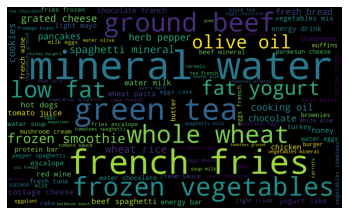

In [10]:
# 去掉停用词
def remove_stop_words(f):
    stop_words = ['Movie']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f

# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    cut_text = word_tokenize(f)
#     print(cut_text)
    cut_text = " ".join(cut_text)
    wc = WordCloud(
        max_words=100,
        width=2000,
        height=1200,
    )
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

word = " ".join( '%s' %item for item in data)
# print(word)
create_word_cloud(word)


### Top10的商品 可视化

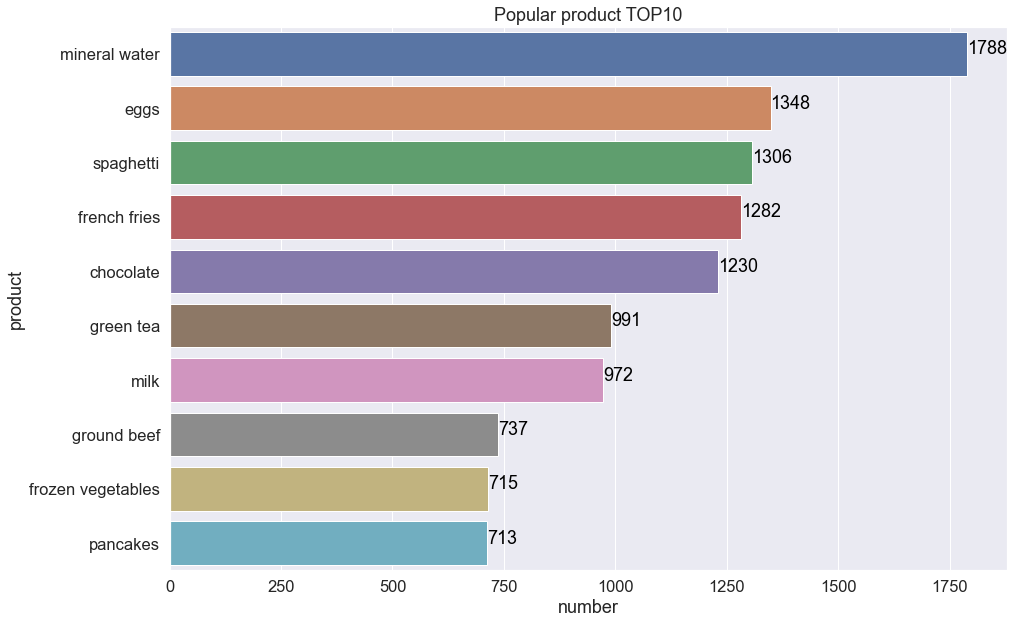

In [11]:
import seaborn as sns
# print(data_num)
# 处理数据
dataDf = pd.DataFrame(data_num[0:10],columns=['name','num'])
# 调整画布
plt.figure(figsize=(15, 10))
# 调整字体
sns.set(font_scale=1.5)
g = sns.barplot(y = 'name',x='num',data = dataDf)
plt.title('Popular product TOP10')
plt.xlabel('number')	
plt.ylabel('product')
# 增加文字显示
for index, row in dataDf.iterrows():
    g.text(row.num,row.name,row.num, color='black')
plt.show()